#Preprocessing



Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor


: 

Data Collection and Processing

In [76]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [77]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [78]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [79]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [80]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [81]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [82]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: معامل الارتباط
1. Positive Correlation
2. Negative Correlation

In [83]:
correlation = gold_data.corr()

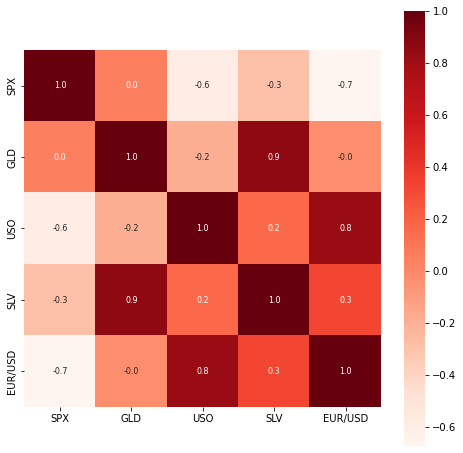

In [84]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

In [85]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


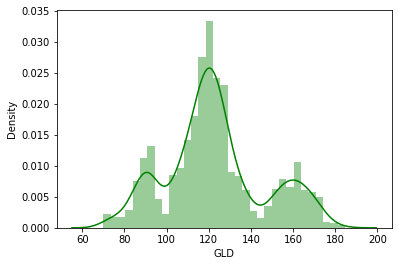

In [86]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [87]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [88]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [89]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#Model Training:


#Random Forest Regressor

In [91]:
regressor = RandomForestRegressor(n_estimators=100)

In [92]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [93]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [94]:
print(test_data_prediction)

[168.25669908  82.19149964 116.09420024 127.68940054 120.82280141
 154.87479766 150.51739847 126.04510045 117.55639868 126.32170021
 116.81460091 171.69530136 141.35329866 167.58859786 115.01160011
 117.88930072 138.12100357 169.83830043 158.58600259 156.25409979
 155.04009956 125.18409963 176.95689935 157.03160387 125.22360056
  93.76789972  77.69570021 120.48130009 119.20419939 167.41279928
  88.26310033 125.34110036  91.19890076 117.66090021 121.08769894
 136.52610006 115.61120133 115.02280071 148.08439971 107.49950085
 104.71100262  87.18969802 126.59860033 117.97780017 152.56829896
 119.55070036 108.2106004  108.02359836  93.14040033 127.2039975
  75.58600041 113.60279908 121.23410043 111.23649912 118.89749894
 120.77019908 158.68980019 167.93500152 146.87899671  86.05139879
  94.30570052  86.71319838  90.66460003 119.07930078 126.42460046
 127.57410003 169.43009933 122.24869951 117.43609871  98.57620036
 168.09040062 143.26309822 131.64440222 121.24640212 120.92199931
 119.682500

In [95]:
regressor.score(X_train,Y_train)

0.9984975755045429

In [96]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888204267221915


Compare the Actual Values and Predicted Values in a Plot

In [97]:
Y_test = list(Y_test)

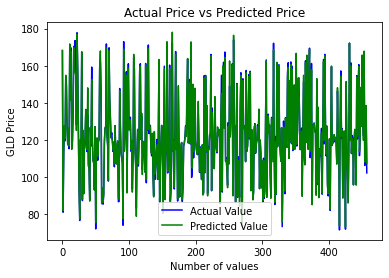

In [98]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# XGBoost

In [99]:
xg=XGBRegressor()
xg.fit(X_train,Y_train)

[21:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [100]:
test_data_prediction_gx = xg.predict(X_test)
print(test_data_prediction_gx)

[167.29465   83.83803  116.5457   126.69601  120.03826  153.10721
 150.1452   125.47777  119.0722   124.290085 115.90055  172.07721
 141.9481   163.74553  115.48286  118.14133  146.99615  168.77565
 159.2201   155.85431  153.8207   125.033195 177.53171  155.55746
 125.01433   95.29178   77.57067  121.87128  118.94023  169.87993
  88.443054 124.56581   91.47181  116.924385 120.069786 143.84334
 115.72174  116.06736  146.49495  110.42031  102.35235   86.58587
 125.888054 115.166855 150.94557  121.79887  108.49245  106.19332
  92.73162  125.45892   73.43168  115.798805 120.24192  112.265884
 120.6652   124.90242  157.90927  167.2536   145.88608   86.22181
  94.832     86.4866    89.63401  118.05444  126.26831  127.313255
 166.64119  121.75183  117.462975 102.29062  165.07495  143.25972
 134.17064  120.83405  124.342606 121.834785 114.38724  117.80851
 110.42031  127.81276  115.16934  104.176926 121.56972  119.07255
  87.39138   90.26947  143.39531  126.02705  114.52117  108.26921
 103.569

In [101]:
xg.score(X_train,Y_train)

0.9861754954225445

In [102]:
# R squared error
error_score_gx = metrics.r2_score(Y_test, test_data_prediction_gx)
print("R squared error : ", error_score)

R squared error :  0.9888204267221915


In [103]:
Y_test = list(Y_test)

In [104]:
xg.score(X_test,Y_test)

0.9768545049270835

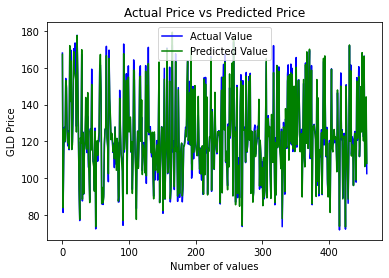

In [105]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction_gx, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Decision Tree

In [106]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [107]:
test_data_prediction_dt = dt.predict(X_test)
print(test_data_prediction_dt)

[168.970001  81.360001 114.769997 127.779999 121.190002 155.139999
 148.220001 126.559998 117.639999 125.620003 117.959999 174.580002
 141.919998 167.179993 116.110001 116.75     134.100006 168.970001
 159.570007 137.770004 155.360001 126.610001 177.210007 157.339996
 125.459999  93.449997  77.559998 122.290001 119.220001 167.990005
  87.370003 124.769997  91.730003 117.919998 121.449997 135.369995
 114.57     115.800003 134.119995 105.720001 105.410004  87.239998
 127.489998 118.360001 155.919998 119.959999 108.419998 107.519997
  93.800003 128.539993  73.300003 113.260002 120.110001 109.860001
 118.919998 121.129997 161.320007 161.520004 146.869995  83.989998
  93.040001  86.879997  91.980003 119.800003 126.139999 127.400002
 173.490005 122.669998 116.209999  97.699997 169.820007 141.899994
 134.279999 120.910004 122.739998 119.190002 113.910004 118.82
 106.260002 127.660004 114.209999 108.470001 115.57     119.699997
  89.910004  87.989998 142.380005 127.150002 114.209999 110.239998

In [108]:
dt.score(X_train,Y_train)

1.0

In [109]:
error_score_dt = metrics.r2_score(Y_test, test_data_prediction_dt)
print("R squared error : ", error_score)

R squared error :  0.9888204267221915


In [110]:
Y_test = list(Y_test)

In [111]:
dt.score(X_test,Y_test)

0.9839354889602968

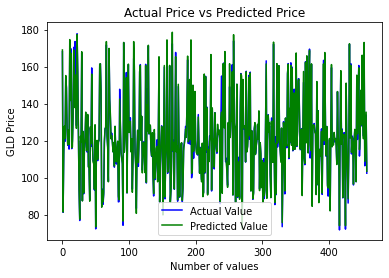

In [112]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction_dt, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

#KNN


In [113]:
knn=KNeighborsRegressor()

In [114]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [115]:
knn.score(X_test,Y_test)

0.9338987197131254

In [116]:
knn.score(X_train,Y_train)

0.9628800784415504